<a href="https://colab.research.google.com/github/seojeong-oh/mom-dad-lab/blob/main/image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 수집

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


필요한 모듈 불러오기

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
#train : test = 8:2

## 데이터 전처리

In [ ]:
redball_train = '/content/gdrive/MyDrive/train_redball/'
redball_test = '/content/gdrive/MyDrive/test_redball/'
#np.random.seed(3)
validation_ratio = 1/8
# train:validation = 8:1

#train 데이터 전처리 옵션 설정
#ImageDataGenerator를 사용할 경우 여러 함수를 통해 이미지 로드 및 이미지 증식을 할 수 있다. 파라미터 설정을 통해 이미지 증식 방식에 대해 정해줄 수 있다.
train_datagen = ImageDataGenerator(rescale=1./255, #정규화
                                  # 이미지 증강 옵션
                                   rotation_range = 40, #회전
                                   width_shift_range = 0.2, #좌우 이동, 이동폭/이미지폭
                                   height_shift_range = 0.2,##상하 이동
                                   shear_range = 0.2,#기울기
                                   zoom_range = 0.2,#확대 축소
                                   horizontal_flip=True,  #좌우 대칭
                                   vertical_flip = True, #상하 대칭
                                   fill_mode = 'nearest',
                                   validation_split=validation_ratio) # validation split 비율 설정


#flow_from_directory는 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling을 해준다.
train_generator = train_datagen.flow_from_directory( 
    directory = redball_train,
    classes = ['redball','basketball'],
    target_size=(256,256),   # all images 사이즈 256X256변경
    class_mode='categorical', #클래스 모드 지정
    #categorical : 2D one-hot 부호화된 라벨 반환
    #binary : 1D Binary 라벨 반환
    #spares : 1D 정수 라벨 반환
    #none : 라벨 반환이 안됨.
    batch_size=3, # 한 epoch당 들어가는 image 파일수
    subset='training')#training data로 명시


#'train_dir' 디렉토리에 저장된 이미지의 일부를 validation data로 split하여 전처리(같은 객체 사용)
validation_generator = train_datagen.flow_from_directory(
    directory=redball_train,## train data와 같은 디렉토리명 지정 
    classes = ['redball','basketball'],
    target_size=(256,256),  
    class_mode='categorical', 
    batch_size=3,
    subset='validation') #validation data로 명시


test_datagen = ImageDataGenerator(rescale = 1./255) #test data에는 이미지 증강을 사용하지 않음

test_generator = test_datagen.flow_from_directory(
    directory = redball_test,
    target_size=(256,256),  
    class_mode='categorical', 
    batch_size=2)

Found 41 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
print(len(train_generator.classes))
print(len(validation_generator.classes))
print(len(test_generator.classes))

41
4
17


## 모델 구축

Sequential : 

In [ ]:
import tensorflow as tf
# layer을 추가하거나 적게하면서 정확도 봐보기

model = tf.keras.models.Sequential([
            #The first convolution
            tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape = (256,256,3)), #input 사이즈 크기 256 x 256, color -> 3, 흑백 -> 1
            #filter수 : 32개, filter 3*3, 
            tf.keras.layers.MaxPool2D(2, 2), #max pooling size : 2*2
            #The second convolution
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), 
            tf.keras.layers.MaxPool2D(2, 2),
            #The third convolution
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPool2D(2, 2),
            #The fourth convolution
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPool2D(2,2),
            #The fifth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            tf.keras.layers.MaxPool2D(2,2),
            #The six convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPool2D(2,2),
            #Flatten -> 1차원 데이터로 바꿔주는 역할
            tf.keras.layers.Flatten(), #벡터를 1차원으로 바꿔줌
            # 픽셀을 펼친 후에는 두개의 dense층이 연속되어 연결 -> 밀집 연결 또는 완전 연결층이라고 부름
            tf.keras.layers.Dense(512, activation='relu'), #첫번째 Dense층은 128개의 노드를 가짐
            # 1 Output neuron
            tf.keras.layers.Dense(2, activation='softmax') #두번째 층은 1개의 노드의 소프트맥스 층 이 층은 1개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 
])        
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)      

## 모델 컴파일하기

모델 컴파일 과정에서는 앞에서 구성한 합성곱 신경망의 손실 함수와 옵티마이저를 설정

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy', #훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 함, 다중 클래스 문제는 Categorical_crossentropy지정
              optimizer = 'rmsprop', #RMSprop(lr=0.001), #최적의 가중치를 검색하는데 사용되는 최적 알고리즘, adam사용
              metrics = ['accuracy']) # metrics : 평가 척도 

In [ ]:
train_generator.samples

41

In [ ]:
#모델 훈련하기

history = model.fit(train_generator,
        steps_per_epoch=train_generator.samples//8, #한 epoch에 사용한 step 수, 총 50개 훈련 샘플, batch_size 5 이므로, 10 step #이거 빼도 상관없음
        verbose = 1, #이거 빼도 상관없음
        epochs=10, #전체 훈련 데이터셋에 대한 학습 반복 횟수 지정. epoch 늘리면 batch_size 크게하기 
        validation_data = validation_generator.samples//8) # 검증데이터셋을 제공할 제너레이터 지정 #이거 빼도 상관없음
        #fit함수에 숨어져 있는 max_batchsize 확인해서 가중치 학습시간 조정하기

Epoch 1/10
5/5 [==============================] - 1s 59ms/step - loss: 0.7974 - accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 0s 84ms/step - loss: 0.7086 - accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 84ms/step - loss: 0.6901 - accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 88ms/step - loss: 0.7381 - accuracy: 0.4667
Epoch 5/10
5/5 [==============================] - 1s 111ms/step - loss: 0.6756 - accuracy: 0.5714
Epoch 6/10
5/5 [==============================] - 0s 86ms/step - loss: 0.7369 - accuracy: 0.5333
Epoch 7/10
5/5 [==============================] - 0s 78ms/step - loss: 0.7002 - accuracy: 0.5333
Epoch 8/10
5/5 [==============================] - 0s 77ms/step - loss: 0.6908 - accuracy: 0.4000
Epoch 9/10
5/5 [==============================] - 0s 65ms/step - loss: 0.6768 - accuracy: 0.5000
Epoch 10/10
5/5 [==============================] - 0s 74ms/step - loss: 1.0093 - accuracy: 0.7333


In [ ]:
import matplotlib.pyplot as plt # 결과를 시각화 하기위한 라이브러리
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend(loc='best')
plt.title('Training and validation accuracy') 


plt.figure(2)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend(loc='best')
plt.title('Training and validation loss') 



plt.show()

KeyError: ignored

In [ ]:
# 훈련된 모델을 test_generator로 평가합니다.
print("-- Evaluate(정확도) --") 
scores = model.evaluate_generator(test_generator, steps=5) 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate(정확도) --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 70.00%


In [ ]:
print("-- Evaluate(정확도) --") 
scores = model.evaluate_generator(validation_generator, steps=5) 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate(정확도) --


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


accuracy: 75.00%


Saving KakaoTalk_20220204_140543156.png to KakaoTalk_20220204_140543156 (1).png
[[0. 1.]]


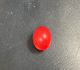

basketball


In [ ]:
# 훈련된 모델에 이미지를 입력하여 직접 결과를 보실 수 있습니다.

import numpy as np
from google.colab import files
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  image_1 = cv2.imread(fn, cv2.IMREAD_REDUCED_COLOR_4)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)
  print(classes)
  if classes[0,0] >= 0.9:
    cv2_imshow(image_1)
    print("red ball")
  else:
    cv2_imshow(image_1)
    print("basketball")
